In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Data Pre-processing

## 1.0 Load dataset

In [4]:
df_train = pd.read_csv('dataset/train_yutong.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25718 entries, 0 to 25717
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          25718 non-null  int64  
 1   listing_id          25718 non-null  int64  
 2   name                25718 non-null  object 
 3   street              25718 non-null  object 
 4   type                25718 non-null  object 
 5   bathrooms           24484 non-null  float64
 6   district            25718 non-null  int64  
 7   region              25718 non-null  object 
 8   planning_area       25718 non-null  object 
 9   subszone            25718 non-null  object 
 10  built_year          25645 non-null  float64
 11  no_of_units         24680 non-null  float64
 12  area_size           25718 non-null  float64
 13  date_listed         25718 non-null  object 
 14  price               25718 non-null  float64
 15  bedrooms            25718 non-null  float64
 16  tenu

In [4]:
df_train.head()

,Unnamed: 0,listing_id,name,street,type,bathrooms,district,region,planning_area,subszone,...,shopp_no_3km,secon_min_distance,secon_no_1km,secon_no_3km,prima_min_distance,prima_no_1km,prima_no_3km,train_min_distance,train_no_1km,train_no_3km
0,0,6998418,seascape,57 cove way,condominium,4.0,4,central region,southern islands,sentosa,...,6,2.739930,0,1,2.511796,0,3,2.110841,0,7
1,1,2046604,la maison,10 moulmein rise,apartment,3.0,11,central region,novena,moulmein,...,70,0.786247,3,27,0.145587,7,35,0.230193,5,53
2,2,7563513,viva,2 suffolk walk,condominium,3.0,11,central region,novena,moulmein,...,70,0.668196,1,28,0.182761,7,34,0.331496,5,50
3,3,3071445,urban treasures,205 jalan eunos,condominium,2.0,14,east region,bedok,kaki bukit,...,25,0.308054,1,30,0.300643,4,33,0.426680,5,24
4,4,9667539,infini at east coast,east coast road,apartment,3.0,15,east region,bedok,frankel,...,18,0.388370,3,20,0.232984,6,22,0.822432,2,18


In [5]:
df_train.describe()

,Unnamed: 0,listing_id,bathrooms,district,built_year,no_of_units,area_size,price,bedrooms,tenure_remains,...,shopp_no_3km,secon_min_distance,secon_no_1km,secon_no_3km,prima_min_distance,prima_no_1km,prima_no_3km,train_min_distance,train_no_1km,train_no_3km
count,25718.000000,2.571800e+04,24484.000000,25718.000000,25645.000000,24680.000000,25718.000000,2.571800e+04,25718.000000,25718.000000,...,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000
mean,12858.500000,5.495814e+06,2.281000,12.212497,1995.159524,461.681483,1251.166343,3.003332e+06,2.566879,380276.113889,...,41.989579,0.605690,2.800451,19.775138,0.481503,3.754024,25.373318,0.410230,4.955984,31.333541
std,7424.291448,2.607456e+06,1.146691,7.011785,33.875646,423.024212,1067.453284,4.340523e+06,1.143536,485386.342802,...,24.588214,0.414985,2.118362,7.724840,0.340616,2.441141,9.615606,0.328124,3.867986,13.351714
min,0.000000,1.000122e+06,1.000000,1.000000,1910.000000,4.000000,323.000000,5.566000e+05,0.000000,0.000000,...,4.000000,0.014425,0.000000,1.000000,0.008718,0.000000,3.000000,0.000051,0.000000,4.000000
25%,6429.250000,3.227969e+06,1.000000,7.000000,1985.000000,130.000000,689.000000,1.342000e+06,2.000000,99.000000,...,18.000000,0.319962,1.000000,15.000000,0.270678,2.000000,19.000000,0.178788,2.000000,20.000000
50%,12858.500000,5.489918e+06,2.000000,11.000000,2013.000000,366.000000,958.000000,1.856800e+06,3.000000,99.000000,...,38.000000,0.522009,3.000000,20.000000,0.401050,3.000000,25.000000,0.332035,4.000000,34.000000
75%,19287.750000,7.764957e+06,3.000000,18.000000,2017.000000,646.000000,1363.750000,2.956800e+06,3.000000,1000000.000000,...,70.000000,0.773172,4.000000,25.000000,0.605686,5.000000,31.000000,0.534392,7.000000,44.000000
max,25717.000000,9.999807e+06,8.000000,28.000000,2029.000000,2203.000000,15000.000000,7.480000e+07,8.000000,1000000.000000,...,82.000000,2.739930,9.000000,40.000000,2.511796,14.000000,50.000000,2.110841,20.000000,55.000000


###  (optional) drop meaningless attributes

In [5]:
meaningless_attrs = ['tenure_remains', 'listing_id', 'date_listed','Unnamed: 0','street','name'
                    ,'planning_area'
                    ,'subszone'     
                     ]


df_train_small = df_train.drop(labels=meaningless_attrs, axis=1)

In [6]:
df_train_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25718 entries, 0 to 25717
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                25718 non-null  object 
 1   bathrooms           24484 non-null  float64
 2   district            25718 non-null  int64  
 3   region              25718 non-null  object 
 4   built_year          25645 non-null  float64
 5   no_of_units         24680 non-null  float64
 6   area_size           25718 non-null  float64
 7   price               25718 non-null  float64
 8   bedrooms            25718 non-null  float64
 9   tenure_years        25718 non-null  int64  
 10  comme_min_distance  25718 non-null  float64
 11  comme_no_1km        25718 non-null  int64  
 12  comme_no_3km        25718 non-null  int64  
 13  gov-m_min_distance  25718 non-null  float64
 14  gov-m_no_1km        25718 non-null  int64  
 15  gov-m_no_3km        25718 non-null  int64  
 16  shop

## 1.1 Label encoding

We need to encode `object` and `int64`.

In [120]:
df_train_small.dtypes

type                   object
bathrooms             float64
district                int64
region                 object
built_year            float64
no_of_units           float64
area_size             float64
price                 float64
bedrooms              float64
tenure_years            int64
comme_min_distance    float64
comme_no_1km            int64
comme_no_3km            int64
gov-m_min_distance    float64
gov-m_no_1km            int64
gov-m_no_3km            int64
shopp_min_distance    float64
shopp_no_1km            int64
shopp_no_3km            int64
secon_min_distance    float64
secon_no_1km            int64
secon_no_3km            int64
prima_min_distance    float64
prima_no_1km            int64
prima_no_3km            int64
train_min_distance    float64
train_no_1km            int64
train_no_3km            int64
dtype: object

### 1.1.A Catagorical features

In [114]:
df_train_small.columns[df_train_small.dtypes==object]

Index(['type', 'region'], dtype='object')

In [119]:
df_train_small.columns[df_train_small.dtypes=='int64']

Index(['district', 'tenure_years', 'comme_no_1km', 'comme_no_3km',
       'gov-m_no_1km', 'gov-m_no_3km', 'shopp_no_1km', 'shopp_no_3km',
       'secon_no_1km', 'secon_no_3km', 'prima_no_1km', 'prima_no_3km',
       'train_no_1km', 'train_no_3km'],
      dtype='object')

In [7]:
df_train_oh = df_train_small.copy()

cat_cols = [ 'type', 'region', 'district','tenure_years']

for i in range(len(cat_cols)):
    df_train_oh = pd.merge(df_train_oh, pd.get_dummies(df_train_oh[cat_cols[i]], prefix=cat_cols[i]), on=df_train_oh.index.values)
    df_train_oh.drop(columns=['key_0', cat_cols[i]], inplace=True)

### 1.1.B Int64 to float

In [8]:
df_train_oh=df_train_oh.astype(float)
df_train_oh.dtypes

bathrooms                   float64
built_year                  float64
no_of_units                 float64
area_size                   float64
price                       float64
bedrooms                    float64
comme_min_distance          float64
comme_no_1km                float64
comme_no_3km                float64
gov-m_min_distance          float64
gov-m_no_1km                float64
gov-m_no_3km                float64
shopp_min_distance          float64
shopp_no_1km                float64
shopp_no_3km                float64
secon_min_distance          float64
secon_no_1km                float64
secon_no_3km                float64
prima_min_distance          float64
prima_no_1km                float64
prima_no_3km                float64
train_min_distance          float64
train_no_1km                float64
train_no_3km                float64
type_apartment              float64
type_condominium            float64
region_central region       float64
region_east region          

## 1.2 Fill nan data

In [9]:
print(df_train_oh.isnull().sum().sort_values(ascending = False).head(5))

bathrooms          1234
no_of_units        1038
built_year           73
tenure_years_99       0
district_28           0
dtype: int64


In [10]:
mean_cols = df_train_oh.mean()
train_data = df_train_oh.fillna(mean_cols)

print(train_data.isnull().sum().sum())

0


## 1.3 Normalization

In [192]:
train_data.columns

Index(['bathrooms', 'built_year', 'no_of_units', 'area_size', 'price',
       'bedrooms', 'comme_min_distance', 'comme_no_1km', 'comme_no_3km',
       'gov-m_min_distance', 'gov-m_no_1km', 'gov-m_no_3km',
       'shopp_min_distance', 'shopp_no_1km', 'shopp_no_3km',
       'secon_min_distance', 'secon_no_1km', 'secon_no_3km',
       'prima_min_distance', 'prima_no_1km', 'prima_no_3km',
       'train_min_distance', 'train_no_1km', 'train_no_3km', 'type_apartment',
       'type_condominium', 'region_central region', 'region_east region',
       'region_north region', 'region_north-east region', 'region_west region',
       'district_1', 'district_2', 'district_3', 'district_4', 'district_5',
       'district_6', 'district_7', 'district_8', 'district_9', 'district_10',
       'district_11', 'district_12', 'district_13', 'district_14',
       'district_15', 'district_16', 'district_17', 'district_18',
       'district_19', 'district_20', 'district_21', 'district_22',
       'district_23', '

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
standard_vars = ['bathrooms', 'built_year', 'no_of_units', 'area_size','bedrooms', 'comme_min_distance','comme_no_1km', 'comme_no_3km',
       'gov-m_min_distance', 'gov-m_no_1km', 'gov-m_no_3km',
       'shopp_min_distance', 'shopp_no_1km', 'shopp_no_3km',
       'secon_min_distance', 'secon_no_1km', 'secon_no_3km',
       'prima_min_distance', 'prima_no_1km', 'prima_no_3km',
       'train_min_distance', 'train_no_1km', 'train_no_3km']
       
non_standard_vars = ['type_apartment',
       'type_condominium', 'region_central region', 'region_east region',
       'region_north region', 'region_north-east region', 'region_west region',
       'district_1', 'district_2', 'district_3', 'district_4', 'district_5',
       'district_6', 'district_7', 'district_8', 'district_9', 'district_10',
       'district_11', 'district_12', 'district_13', 'district_14',
       'district_15', 'district_16', 'district_17', 'district_18',
       'district_19', 'district_20', 'district_21', 'district_22',
       'district_23', 'district_25', 'district_26', 'district_27',
       'district_28', 'tenure_years_99', 'tenure_years_999']

df_stand_part = pd.DataFrame(StandardScaler().fit_transform(train_data[standard_vars]), columns=standard_vars,
                            index=train_data.index)
df_train_stand = pd.concat([train_data[non_standard_vars], df_stand_part], axis=1)

In [13]:
df_train_stand

,type_apartment,type_condominium,region_central region,region_east region,region_north region,region_north-east region,region_west region,district_1,district_2,district_3,...,shopp_no_3km,secon_min_distance,secon_no_1km,secon_no_3km,prima_min_distance,prima_no_1km,prima_no_3km,train_min_distance,train_no_1km,train_no_3km
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.463721,5.143039,-1.322015,-2.430536,5.960762,-1.537845,-2.326817,5.182931,-1.281308,-1.822539
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.139203,0.435103,0.094201,0.935295,-0.986220,1.329722,1.001171,-0.548697,0.011380,1.622779
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.139203,0.150626,-0.849943,1.064750,-0.877082,1.329722,0.897172,-0.239956,0.011380,1.398084
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.690978,-0.717235,-0.849943,1.323660,-0.530989,0.100765,0.793172,0.050133,0.011380,-0.549269
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.975673,-0.523691,0.094201,0.029110,-0.729630,0.920069,-0.350824,1.256263,-0.764233,-0.998658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25713,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.220544,-0.757625,0.566274,-0.359256,-0.829750,0.100765,-0.454823,0.160414,-0.505695,1.023593
25714,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.017191,-0.544238,0.094201,0.676385,-0.298463,-0.718540,0.585173,-0.434884,-0.247158,0.873797
25715,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.057014,-1.312238,1.038346,0.288020,-1.044133,0.920069,0.585173,-0.852611,-0.505695,-1.448048
25716,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.935002,-0.517946,0.094201,0.805840,-0.188764,-0.308888,-0.142825,-0.745817,-0.764233,-1.373149


# 2. RF Model Training

In [14]:
train_X = df_train_stand.loc[:, df_train_stand.columns != "price"].values
train_y = df_train_oh.price.values

## 2.1 Split cross-validation set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [167]:
X_train.shape

(20574, 59)

In [168]:
X_test.shape

(5144, 59)

## 2.2 HP searching

In [1]:
import seaborn as sns


Bad key text.latex.preview in file D:\anaconda3\envs\pytorch_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file D:\anaconda3\envs\pytorch_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file D:\anaconda3\envs\pytorch_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality paramet

D:\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

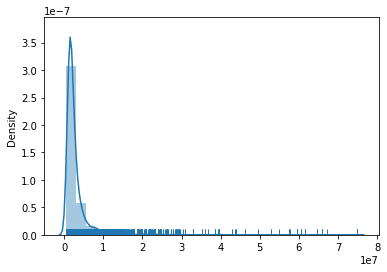

In [17]:
sns.distplot(y_train, kde=True, bins=30, rug=True)

D:\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

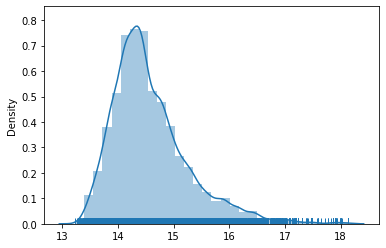

In [18]:
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log , kde=True, bins=30, rug=True)

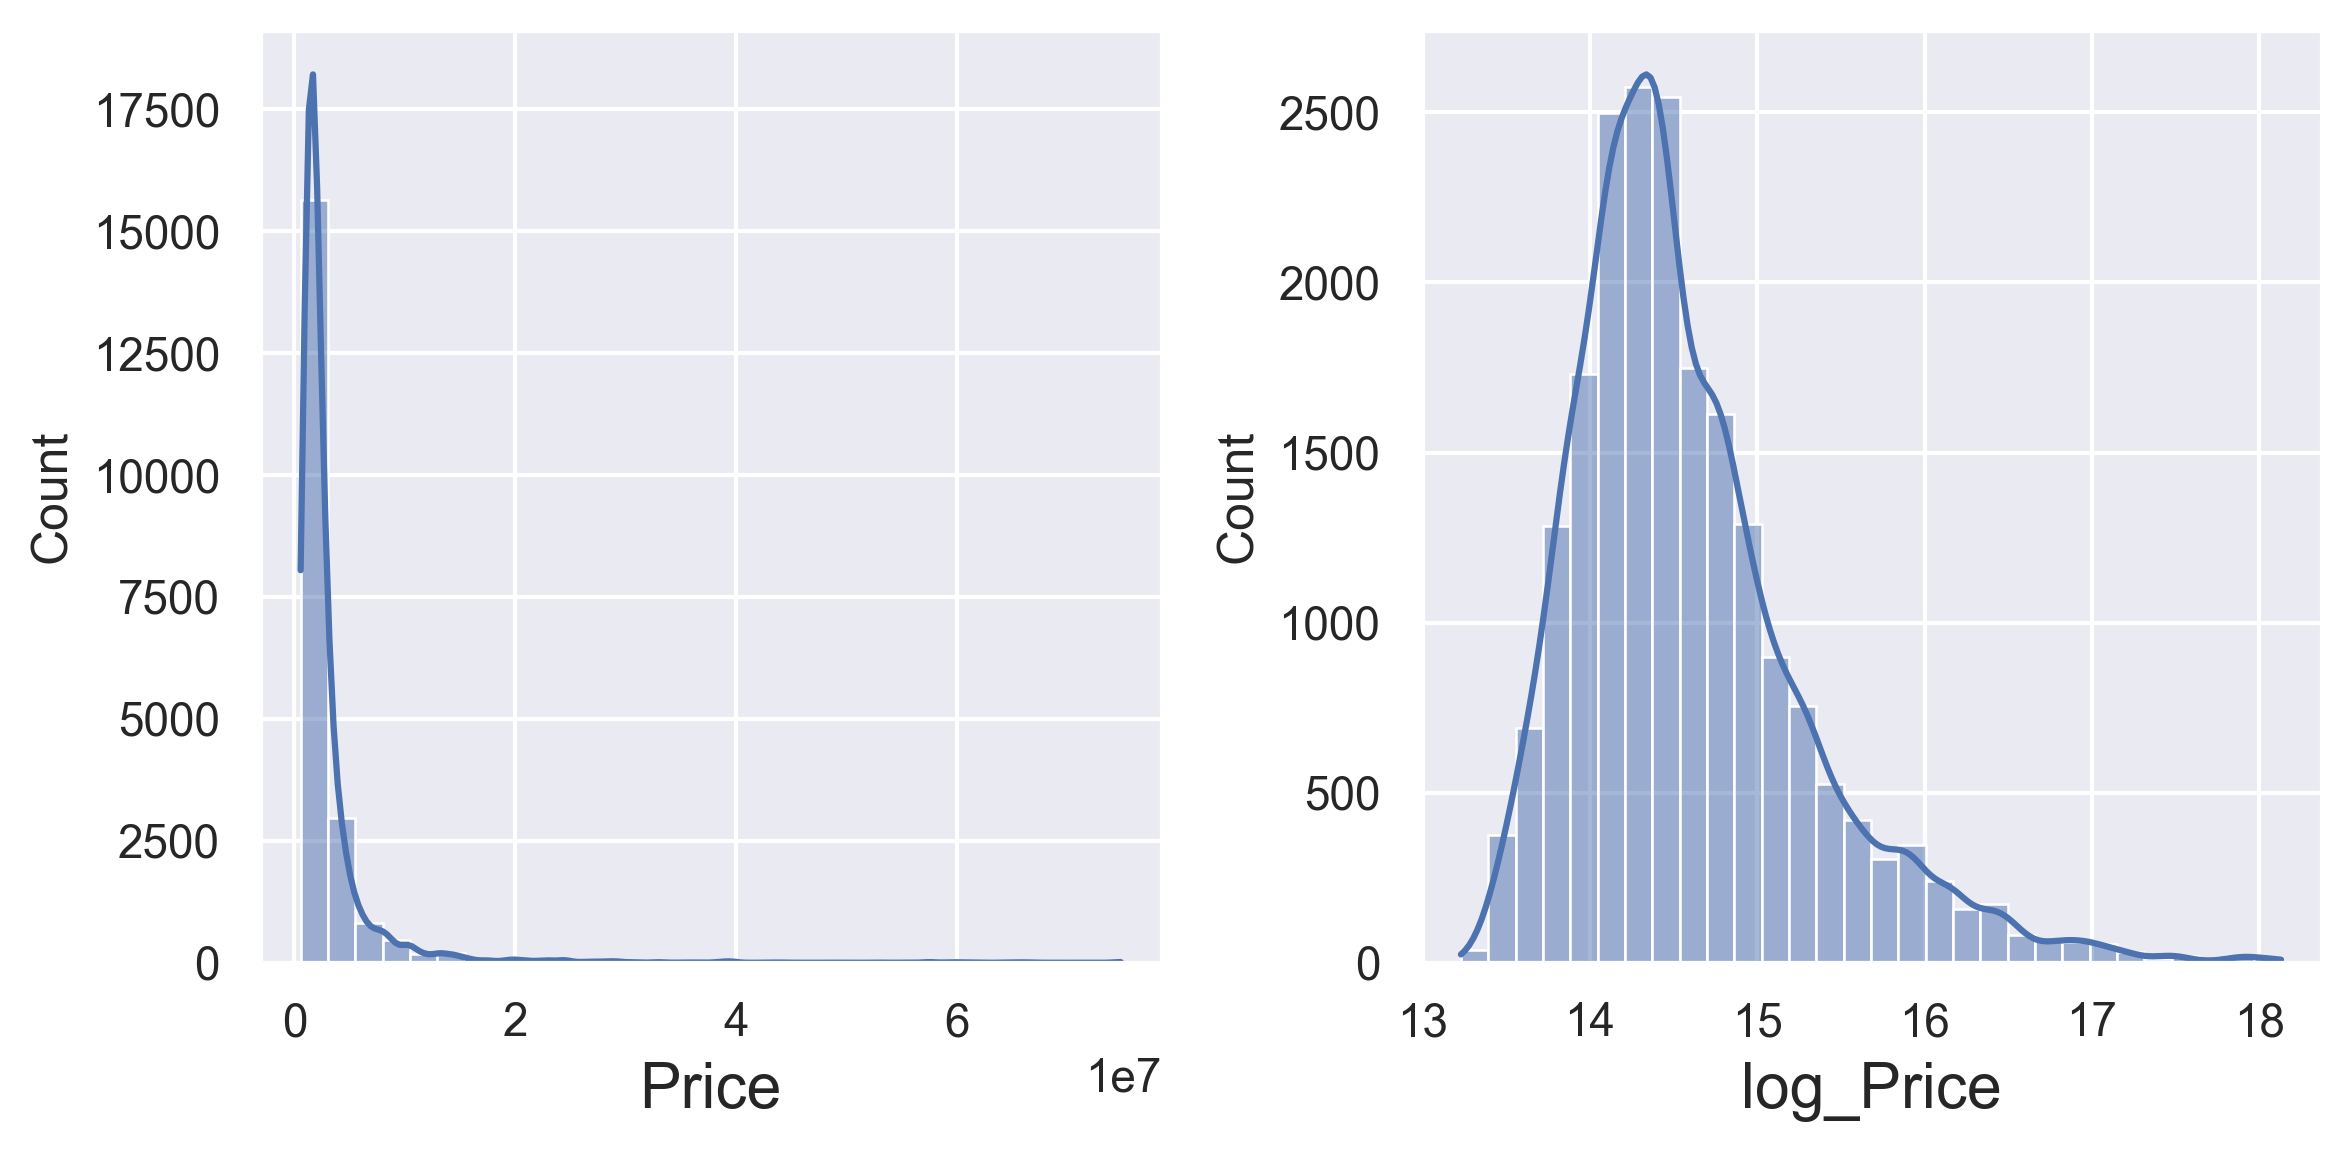

In [28]:
sns.set(style="darkgrid")

fig=plt.figure(dpi=300,figsize=(8,4))

fig.add_subplot(1,2,1)
sns.histplot(y_train , kde=True, bins=30)
plt.xlabel('Price',size=15)

fig.add_subplot(1,2,2)
sns.histplot(y_train_log , kde=True, bins=30)
plt.xlabel('log_Price',size=15)

plt.tight_layout()
plt.savefig('image/y_logy.png')

Use y and log y to do haper params searching and then train models. And save models to local.

In [56]:
import pickle as pkl
model_dir='saved_model/'

In [54]:
results=pd.DataFrame(columns=['Model','Dependent Var','Searching Space','Best Param'])
results['Model']=['Ridge','Ridge','Random Forest','Random Forest']
results['Dependent Var']=['y','log_y','y','log_y']
results

,Model,Dependent Var,Searching Space,Best Param
0,Ridge,y,NaN,NaN
1,Ridge,log_y,NaN,NaN
2,Random Forest,y,NaN,NaN
3,Random Forest,log_y,NaN,NaN


### Ridge Regression

#### Use y

In [85]:
%%time
from sklearn.linear_model import RidgeCV

#hp searching
model_name='Ridge_y'
alphas=[0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
X=X_train
y=y_train

clf = RidgeCV(alphas=alphas,scoring='neg_mean_absolute_error').fit(X, y)
best_para=clf.alpha_

results.iloc[0,2:]=[alphas,best_para]

clf_best=Ridge(best_para,random_state=42)

#save model
with open(model_dir+f'{model_name}.pkl', 'wb') as f:
    pkl.dump(clf_best, f, protocol=pkl.HIGHEST_PROTOCOL)


D:\anaconda3\envs\pytorch_gpu\lib\site-packages\pandas\core\dtypes\cast.py:869: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
D:\anaconda3\envs\pytorch_gpu\lib\site-packages\pandas\core\internals\blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


Wall time: 702 ms


#### Use log y

In [86]:
%%time
from sklearn.linear_model import RidgeCV

#hp searching
model_name='Ridge_log_y'
alphas=[0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
X=X_train
y=y_train_log

clf = RidgeCV(alphas=alphas,scoring='neg_mean_absolute_error').fit(X, y)
best_para=clf.alpha_

results.iloc[1,2:]=[alphas,best_para]

clf_best=Ridge(best_para,random_state=42)

#save model
with open(model_dir+f'{model_name}.pkl', 'wb') as f:
    pkl.dump(clf_best, f, protocol=pkl.HIGHEST_PROTOCOL)

Wall time: 137 ms


D:\anaconda3\envs\pytorch_gpu\lib\site-packages\pandas\core\dtypes\cast.py:869: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
D:\anaconda3\envs\pytorch_gpu\lib\site-packages\pandas\core\internals\blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


### Random Forest

#### Use y

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [151]:
%%time

model_name='RF_y'
X=X_train
y=y_train

param_grid = {    'n_estimators':[10,50,200,300,500]
                    ,'max_depth':[10, 30,50,70,100]
                    ,'max_features':[.1,.3,.5,.7,.9,.99]
                    }

#hp searching
rf = RandomForestRegressor(random_state=42)

model = GridSearchCV(rf, param_grid=param_grid,scoring='neg_mean_absolute_error')
model.fit(X, y)

best_params = model.best_params_

results.iloc[2,2:]=[param_grid ,best_params]

clf_best=RandomForestRegressor(**best_params)

#save model
with open(model_dir+f'{model_name}.pkl', 'wb') as f:
    pkl.dump(clf_best, f, protocol=pkl.HIGHEST_PROTOCOL)


Wall time: 2h 47min 6s


#### Use log y

In [152]:
%%time

model_name='RF_log_y'
X=X_train
y=y_train_log

param_grid = {    'n_estimators':[10,50,200,300,500]
                    ,'max_depth':[10, 30,50,70,100]
                    ,'max_features':[.1,.3,.5,.7,.9,.99]
                    }

#hp searching
rf = RandomForestRegressor(random_state=42)

model = GridSearchCV(rf, param_grid=param_grid,scoring='neg_mean_absolute_error')
model.fit(X, y)

best_params = model.best_params_

results.iloc[3,2:]=[param_grid ,best_params]

model_name='RF_log_y'

clf_best=RandomForestRegressor(**best_params)

#save model
with open(model_dir+f'{model_name}.pkl', 'wb') as f:
    pkl.dump(clf_best, f, protocol=pkl.HIGHEST_PROTOCOL)

Wall time: 2h 29min 15s


In [153]:
results.to_csv('HP searching.csv')
results

,Model,Dependent Var,Searching Space,Best Param
0,Ridge,y,"[0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]",100.0
1,Ridge,log_y,"[0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]",10.0
2,Random Forest,y,"{'n_estimators': [10, 50, 200, 300, 500], 'max...","{'max_depth': 50, 'max_features': 0.9, 'n_esti..."
3,Random Forest,log_y,"{'n_estimators': [10, 50, 200, 300, 500], 'max...","{'max_depth': 30, 'max_features': 0.7, 'n_esti..."


# 3 Evaluation

In [154]:
from sklearn.metrics import mean_squared_error

In [155]:
def eval(model_name,log_y):
    #read model
    with open(model_dir+f'{model_name}.pkl', 'rb') as f:
        model=pkl.load(f)

    if log_y:
        X=X_train
        y=y_train_log
        model.fit(X,y)
        y_ = model.predict(X_test)
        y_pred=np.expm1(y_)
        score = model.score(X_test,np.log1p(y_test))

        rmse=np.sqrt(mean_squared_error(y_pred,y_test))

    else:
        X=X_train
        y=y_train
        model.fit(X,y)
        y_pred = model.predict(X_test)
        score = model.score(X_test,y_test)

        rmse=np.sqrt(mean_squared_error(y_pred,y_test))

    print(f'Evaluation on {model_name}:')
    print('R2:', score)
    print('RMSE:', rmse)

    return score,rmse

In [156]:
%%time
evaluation=pd.DataFrame(columns=['R2','RMSE'],index=['Ridge_y','Ridge_log_y','RF_y','RF_log_y'])

for model_name in ['Ridge_y','RF_y']:
    score,rmse=eval(model_name=model_name,log_y=False)
    evaluation.loc[model_name]=[score,rmse]

for model_name in ['Ridge_log_y','RF_log_y']:  
    score,rmse=eval(model_name=model_name,log_y=True)
    evaluation.loc[model_name]=[score,rmse]

evaluation.to_csv('evaluation.csv')
evaluation

Evaluation on Ridge_y:
R2: 0.8283776007506253
RMSE: 1779979.6175210944
Evaluation on RF_y:
R2: 0.9742355800983786
RMSE: 689665.0676359573
Evaluation on Ridge_log_y:
R2: 0.9111450848508141
RMSE: 3124882.3781275847
Evaluation on RF_log_y:
R2: 0.9805543282289934
RMSE: 788818.0418165328
Wall time: 1min 22s


,R2,RMSE
Ridge_y,0.828378,1779979.617521
Ridge_log_y,0.911145,3124882.378128
RF_y,0.974236,689665.067636
RF_log_y,0.980554,788818.041817


# 4. Inference

In [157]:
test = pd.read_csv('dataset/test_yutong.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7500 non-null   int64  
 1   listing_id          7500 non-null   int64  
 2   name                7500 non-null   object 
 3   street              7500 non-null   object 
 4   type                7500 non-null   object 
 5   bathrooms           7163 non-null   float64
 6   district            7500 non-null   int64  
 7   region              7500 non-null   object 
 8   planning_area       7500 non-null   object 
 9   subszone            7500 non-null   object 
 10  built_year          7452 non-null   float64
 11  no_of_units         7174 non-null   float64
 12  area_size           7500 non-null   float64
 13  date_listed         7500 non-null   object 
 14  bedrooms            7500 non-null   int64  
 15  tenure_remains      7500 non-null   int64  
 16  tenure

In [158]:
# drop attr
df_test=test.copy()
df_test = df_test.drop(labels=meaningless_attrs, axis=1)

# one-hot encoding
for i in range(len(cat_cols)):
    df_test = pd.merge(df_test, pd.get_dummies(df_test[cat_cols[i]], prefix=cat_cols[i]), on=df_test.index.values)
    df_test.drop(columns=['key_0', cat_cols[i]], inplace=True)

# int to float
df_test=df_test.astype(float)

# fill nan
mean_cols = df_test.mean()
df_test = df_test.fillna(mean_cols)


df_stand_part = pd.DataFrame(StandardScaler().fit_transform(df_test[standard_vars]), columns=standard_vars,index=df_test.index)
df_test = pd.concat([df_test[non_standard_vars], df_stand_part], axis=1)

In [159]:
test_X = df_test.values
test_X.shape

(7500, 59)

In [160]:
def inf(model_name,log_y):
        #read model
    with open(model_dir+f'{model_name}.pkl', 'rb') as f:
        model=pkl.load(f)
        
    if log_y:
        model.fit(train_X, np.log1p(train_y))
        y_ = model.predict(test_X)
        y_pred=np.expm1(y_)
    else:
        model.fit(train_X, train_y)
        y_pred = model.predict(test_X)
    
    return y_pred

In [161]:
%%time
prediction=pd.DataFrame(columns=['Ridge_y','RF_y','Ridge_log_y','RF_log_y'])

for model_name in ['Ridge_y','RF_y']:
    y_pred=inf(model_name=model_name,log_y=False)
    prediction[f'{model_name}']=y_pred

for model_name in ['Ridge_log_y','RF_log_y']:  
    y_pred=inf(model_name=model_name,log_y=True)
    prediction[f'{model_name}']=y_pred

prediction.to_csv('prediction.csv')
prediction

Wall time: 1min 41s


,Ridge_y,RF_y,Ridge_log_y,RF_log_y
0,1.568657e+06,1.984778e+06,2.102187e+06,1.977664e+06
1,2.664302e+06,2.573034e+06,2.674517e+06,2.563836e+06
2,1.685755e+05,7.377412e+05,8.436621e+05,7.364561e+05
3,2.300200e+05,9.169067e+05,9.022001e+05,9.216612e+05
4,2.056484e+07,2.028116e+07,2.160047e+07,2.039953e+07
...,...,...,...,...
7495,1.695947e+06,1.305490e+06,1.293203e+06,1.303026e+06
7496,4.451723e+06,2.028720e+06,2.669964e+06,2.022960e+06
7497,1.132083e+06,1.638940e+06,1.473054e+06,1.637165e+06
7498,5.896607e+05,9.527378e+05,9.332352e+05,9.395472e+05


# Plot the predicted results

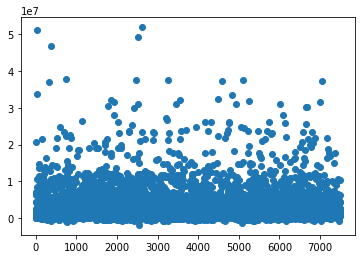

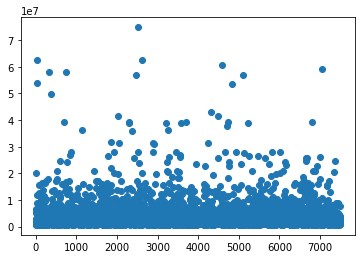

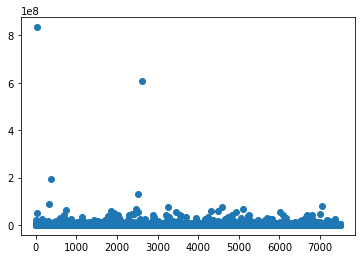

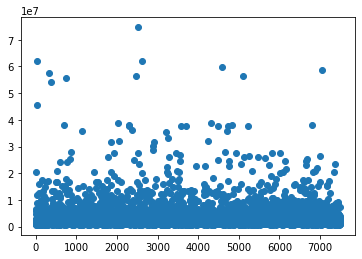

In [166]:
for model_name in ['Ridge_y','RF_y','Ridge_log_y','RF_log_y']:
    plt.scatter(prediction[model_name].index,prediction[model_name])
    plt.show()

In [163]:
best_model_name='RF_log_y'

y_pred_to_submit=prediction[best_model_name].values

from datetime import datetime
current_time = datetime.now().strftime("__%Y_%m_%d__%H_%M_%S__")

# save the submission to kaggle
submission_df = pd.DataFrame(data = {'Id':test.index,'Predicted':y_pred_to_submit})
submission_df.to_csv(f'submission_{current_time}.csv',columns = ['Id','Predicted'],index = False)